# Tutorial

In the following we will demonstrate the `epmatools` package. It is currently capable of doing just few impressive things:

In [1]:
from epmatools import *

## Basic usage

We should start with importing some data as oxides in wt%. You can use `Oxides` methods `from_excel()` or `from_clipboard()`, but for now we will use some example data provided:

In [2]:
d = Oxides.from_examples('minerals').set_index('Comment')
d

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3
Comment,,,,,,,,,,,,,
bt-01,37.2180,20.3490,13.7840,13.1400,0.0000,0.0130,8.9980,0.4040,1.0100,0.0220,0.0200,0.0050,0.0070
bt-02,37.3630,20.0370,14.1060,12.5390,0.0000,0.0130,8.9460,0.4610,1.2060,0.0200,0.0420,0.0000,0.0000
chl-04,23.7480,22.1520,9.6110,31.5490,0.0660,0.0280,0.0230,0.0350,0.0470,0.0000,0.0170,0.0370,0.0000
pa-05,46.9860,39.1830,0.1510,1.2640,0.0330,0.4100,3.4090,4.8830,0.0830,0.0000,0.0000,0.0060,0.0000
cd-06,48.3890,32.4140,8.2270,7.7130,0.0600,0.0270,0.0000,0.9240,0.0050,0.0090,0.0000,0.0050,0.0000
cd-07,48.8700,32.6960,8.3900,7.4820,0.0680,0.0490,0.0000,0.8450,0.0000,0.0000,0.0000,0.0000,0.0000
pl-08,61.8390,24.6610,0.0000,0.4840,0.0150,5.7380,0.0320,7.9170,0.0000,0.0100,0.0190,0.0250,0.0000
g-09,37.8160,21.1840,4.1890,35.1180,1.0010,1.4350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060,0.0000
g-10,37.5840,21.3110,4.6510,33.8950,0.9990,1.4540,0.0000,0.0350,0.0130,0.0340,0.0000,0.0300,0.1070


To select just subset of data, we can use `get_sample()` method. Using string argument, you can search for text in index, using numeric, you can select particular analysis. Note, that index could be modified by `reset_index()` and `set_index()` methods.

In [3]:
g = d.get_sample("g")
g

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3
Comment,,,,,,,,,,,,,
g-09,37.8160,21.1840,4.1890,35.1180,1.0010,1.4350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060,0.0000
g-10,37.5840,21.3110,4.6510,33.8950,0.9990,1.4540,0.0000,0.0350,0.0130,0.0340,0.0000,0.0300,0.1070


Analyses could be converted to cations p.f.u, either providing number of oxygens or `Mineral` instance.

In [4]:
g.cations(12)

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
Comment,,,,,,,,,,,,,
g-09,3.0034,1.9829,0.4960,2.3325,0.0673,0.1221,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0000
g-10,2.9914,1.9991,0.5519,2.2562,0.0673,0.1240,0.0000,0.0054,0.0008,0.0021,0.0000,0.0020,0.0045


In [5]:
grt = mindb.Garnet()
apfu = g.apfu(grt)
apfu

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+},Fe{3+}
Comment,,,,,,,,,,,,,,
g-09,3.0016,1.9817,0.4957,2.3174,0.0673,0.1220,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0000,0.0138
g-10,2.9896,1.9979,0.5515,2.2409,0.0673,0.1239,0.0000,0.0054,0.0008,0.0021,0.0000,0.0020,0.0045,0.0140


Cations calculated according to mineral structural formula, could be used to calculate endmembers proportios (if defined for given mineral).

In [6]:
apfu.endmembers()

,Alm,Prp,Sps,Grs,Adr,Uv,CaTi
Comment,,,,,,,
g-09,0.771846,0.165092,0.022414,0.040367,0.000281,0.000000,0.000000
g-10,0.751056,0.184851,0.022559,0.041276,0.000197,0.000044,0.000016


Recalculate plagioclase...

In [7]:
f = d.get_sample("pl-")
f

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3
Comment,,,,,,,,,,,,,
pl-08,61.8390,24.6610,0.0000,0.4840,0.0150,5.7380,0.0320,7.9170,0.0000,0.0100,0.0190,0.0250,0.0000
pl-22,60.6570,25.0870,0.0010,0.0000,0.0000,5.8490,0.1060,7.9400,0.0000,0.0000,0.0030,0.1130,0.0000
pl-23,61.3380,25.0250,0.0150,0.0300,0.0030,5.8010,0.0790,7.9970,0.0470,0.0000,0.0570,0.0640,0.0000


In [8]:
plg = mindb.Feldspar()
apfu = f.apfu(plg)
apfu

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
Comment,,,,,,,,,,,,,
pl-08,2.7240,1.2803,0.0000,0.0178,0.0006,0.2708,0.0018,0.6762,0.0000,0.0003,0.0006,0.0009,0.0000
pl-22,2.6968,1.3145,0.0001,0.0000,0.0000,0.2786,0.0060,0.6844,0.0000,0.0000,0.0001,0.0043,0.0000
pl-23,2.7076,1.3019,0.0010,0.0011,0.0001,0.2744,0.0044,0.6844,0.0016,0.0000,0.0019,0.0024,0.0000


In [9]:
apfu.endmembers()

,An,Ab,Or
Comment,,,
pl-08,0.285438,0.712666,0.001895
pl-22,0.287517,0.706279,0.006204
pl-23,0.284836,0.710546,0.004619


You can also find out cations p.f.u. not only from your analysis, but also from site occupancies for given mineral structural formula.

In [10]:
apfu.mineral_apfu()

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
Comment,,,,,,,,,,,,,
pl-08,2.7240,1.2760,0.0000,0.0000,0.0000,0.2708,0.0018,0.6762,0.0000,0.0000,0.0000,0.0000,0.0000
pl-22,2.6968,1.3032,0.0000,0.0000,0.0000,0.2786,0.0060,0.6844,0.0000,0.0000,0.0000,0.0000,0.0000
pl-23,2.7076,1.2924,0.0000,0.0000,0.0000,0.2744,0.0044,0.6844,0.0000,0.0000,0.0000,0.0000,0.0000


The difference between analysis and site occupancies could by accessed by property `reminder`

In [11]:
apfu.reminder

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
Comment,,,,,,,,,,,,,
pl-08,0.0,0.004244,0.000000,0.017830,0.000560,0.0,0.0,0.0,0.000000,0.000348,0.000618,0.000932,0.0
pl-22,0.0,0.011309,0.000066,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000098,0.004253,0.0
pl-23,0.0,0.009495,0.000987,0.001107,0.000112,0.0,0.0,0.0,0.001561,0.000000,0.001857,0.002392,0.0


## Plotting

The module plotting providing some common plots, e.g. garnet profiles. Here is quick example

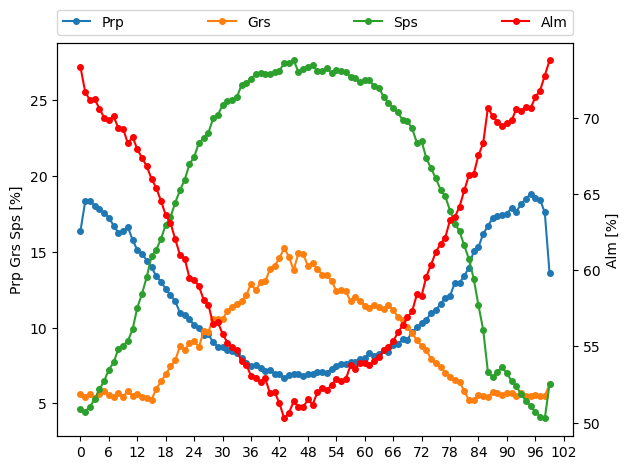

In [12]:
gp = Oxides.from_examples("grt_profile")
em = gp.apfu(grt).endmembers()
minplot.plot_grt_profile(em, percents=True)

## EDS maps

In [13]:
from epmatools.maps import MapStore

In [14]:
h5 = MapStore.from_examples('ex1')
h5.samples

['Demo']

In [15]:
s = h5.get_sample('Demo')

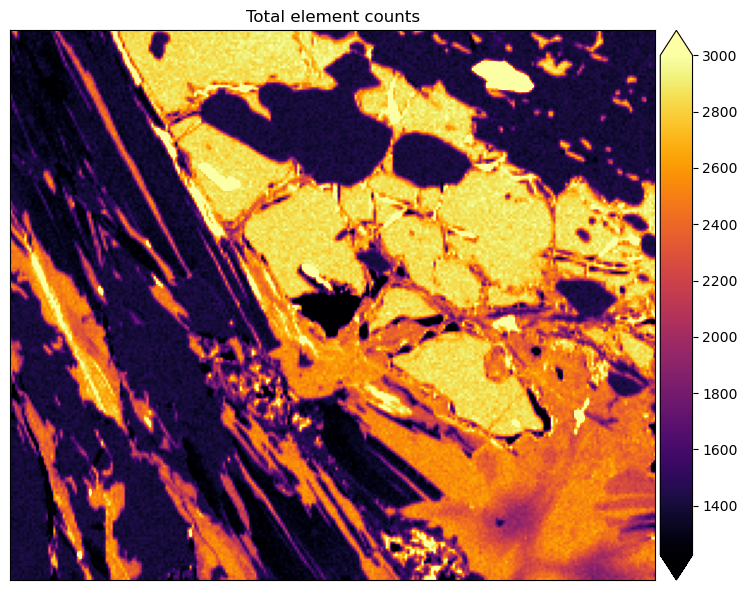

In [16]:
s.show()

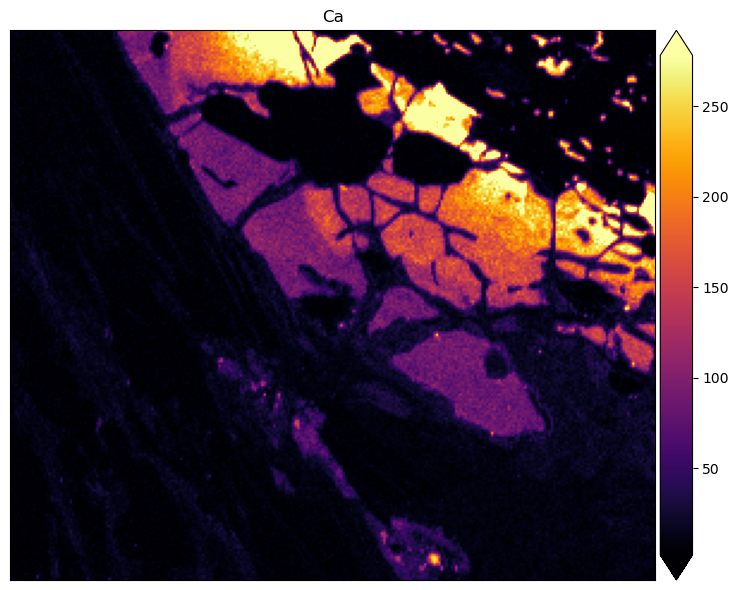

In [17]:
s.show('Ca')

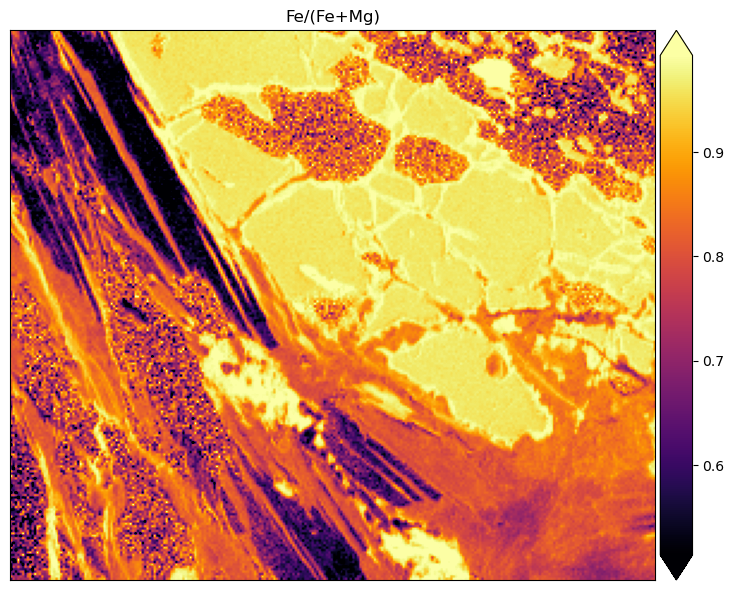

In [18]:
s.show('Fe/(Fe+Mg)')

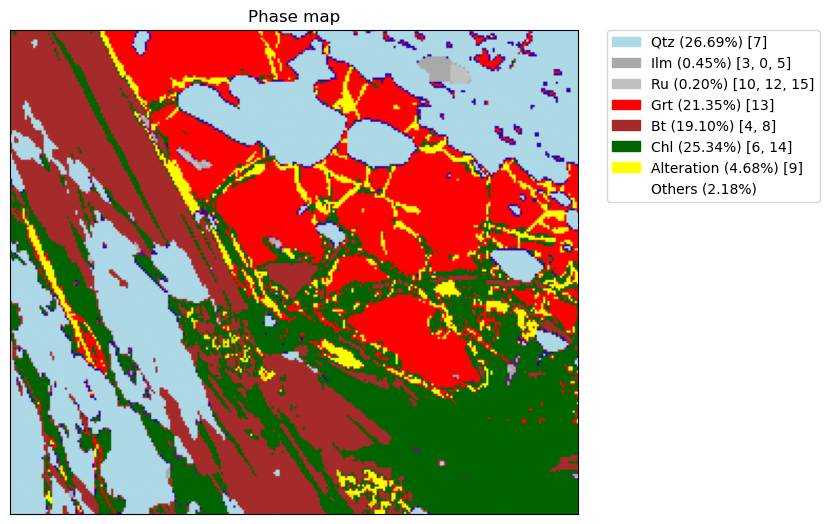

In [19]:
s.phasemap()